###**Context:**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

###**Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

###**Data dictionary:**

1.loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

2.term : The number of payments on the loan. Values are in months and can be either 36 or 60.

3.int_rate : Interest Rate on the loan

4.installment : The monthly payment owed by the borrower if the loan originates.

5.grade : LoanTap assigned loan grade

6.sub_grade : LoanTap assigned loan subgrade

7.emp_title :The job title supplied by the Borrower when applying for the loan.*

8.emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

9.home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.

10.annual_inc : The self-reported annual income provided by the borrower during registration.

11.verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified

12.issue_d : The month which the loan was funded

13.loan_status : Current status of the loan - Target Variable

14.purpose : A category provided by the borrower for the loan request.

15.title : The loan title provided by the borrower

16.dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

17.earliest_cr_line :The month the borrower's earliest reported credit line was opened

18.open_acc : The number of open credit lines in the borrower's credit file.

19.pub_rec : Number of derogatory public records

20.revol_bal : Total credit revolving balance

21.revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

22.total_acc : The total number of credit lines currently in the borrower's credit file

23.initial_list_status : The initial listing status of the loan. Possible values are – W, F

24.application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

25.mort_acc : Number of mortgage accounts.

26.pub_rec_bankruptcies : Number of public record bankruptcies

27.Address: Address of the individual

###Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("/content/logistic_regression.csv")

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(12409, 27)

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,12409.000000,12409.000000,12409.000000,1.240900e+04,12408.000000,12408.000000,12408.000000,12408.000000,12401.000000,12408.000000,11287.000000,12393.000000
mean,14159.247320,13.650211,433.505532,7.416127e+04,17.343524,11.314555,0.180045,15850.155706,53.513233,25.385235,1.797998,0.120955
std,8336.864819,4.480178,249.152385,5.245257e+04,8.310514,5.126020,0.510373,19032.971136,24.426463,11.840762,2.136064,0.353860
min,900.000000,5.320000,21.620000,2.500000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.590000,256.230000,4.500000e+04,11.250000,8.000000,0.000000,5972.000000,35.400000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,379.330000,6.400000e+04,16.775000,11.000000,0.000000,11142.500000,54.600000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,568.640000,9.000000e+04,22.880000,14.000000,0.000000,19718.750000,72.800000,32.000000,3.000000,0.000000
max,40000.000000,28.990000,1533.810000,2.500000e+06,189.900000,49.000000,9.000000,382666.000000,113.000000,105.000000,34.000000,5.000000


###**Data Cleaning:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12409 entries, 0 to 12408
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             12409 non-null  float64
 1   term                  12409 non-null  object 
 2   int_rate              12409 non-null  float64
 3   installment           12409 non-null  float64
 4   grade                 12409 non-null  object 
 5   sub_grade             12409 non-null  object 
 6   emp_title             11705 non-null  object 
 7   emp_length            11843 non-null  object 
 8   home_ownership        12409 non-null  object 
 9   annual_inc            12409 non-null  float64
 10  verification_status   12409 non-null  object 
 11  issue_d               12409 non-null  object 
 12  loan_status           12409 non-null  object 
 13  purpose               12409 non-null  object 
 14  title                 12355 non-null  object 
 15  dti                

####Verifying Column Data Types for Data Consistency

In [ ]:
# Non-numeric columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address'], dtype='object')

In [ ]:
# Number of unique values in all non-numeric columns
for col in cat_cols:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in term: 2
No. of unique values in grade: 7
No. of unique values in sub_grade: 35
No. of unique values in emp_title: 8411
No. of unique values in emp_length: 11
No. of unique values in home_ownership: 5
No. of unique values in verification_status: 3
No. of unique values in issue_d: 110
No. of unique values in loan_status: 2
No. of unique values in purpose: 14
No. of unique values in title: 2473
No. of unique values in earliest_cr_line: 503
No. of unique values in initial_list_status: 2
No. of unique values in application_type: 3
No. of unique values in address: 12404


In [ ]:
#Converting Earliest Credit Line and Issue Date to Datetime Format
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [ ]:
# Converting Employment Length to Numeric Format
d = {'10+ years':10, '4 years':4, '< 1 year':0,
     '6 years':6, '9 years':9,'2 years':2, '3 years':3,
     '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length']=df['emp_length'].replace(d)

In [ ]:
# Converting Columns with Few Unique Values to Categorical Columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12409 entries, 0 to 12408
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             12409 non-null  float64       
 1   term                  12409 non-null  category      
 2   int_rate              12409 non-null  float64       
 3   installment           12409 non-null  float64       
 4   grade                 12409 non-null  category      
 5   sub_grade             12409 non-null  category      
 6   emp_title             11705 non-null  object        
 7   emp_length            11843 non-null  float64       
 8   home_ownership        12409 non-null  category      
 9   annual_inc            12409 non-null  float64       
 10  verification_status   12409 non-null  category      
 11  issue_d               12409 non-null  datetime64[ns]
 12  loan_status           12409 non-null  category      
 13  purpose         

####Identifying and Handling Duplicate Values

In [ ]:
df.duplicated().sum()

0

* There are no duplicate instances in the data

####Managing Missing Values in Data

In [ ]:
df.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                704
emp_length               566
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     54
dti                        1
earliest_cr_line           1
open_acc                   1
pub_rec                    1
revol_bal                  1
revol_util                 8
total_acc                  1
initial_list_status        1
application_type           1
mort_acc                1122
pub_rec_bankruptcies      16
address                    1
dtype: int64

In [ ]:
# Filling Missing Values with 'Unknown' for Object Data Types
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

#Performing Mean Aggregation of 'mort_acc' by 'total_acc' to Fill Missing Values
avg_mort = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [ ]:
def fill_mort(total_acc, mort_acc):
    # Check if mort_acc is NaN
    if np.isnan(mort_acc):
        # Handle NaN case here, for example, you can return a default value or do some other processing
        return 0  # Defaulting to 0 if 'mort_acc' is NaN
    else:
        # Return the provided value if it's not NaN
        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'], x['mort_acc']), axis=1)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [ ]:
df.shape

(11820, 27)

###**Outlier treatment:**

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'], dtype='object')

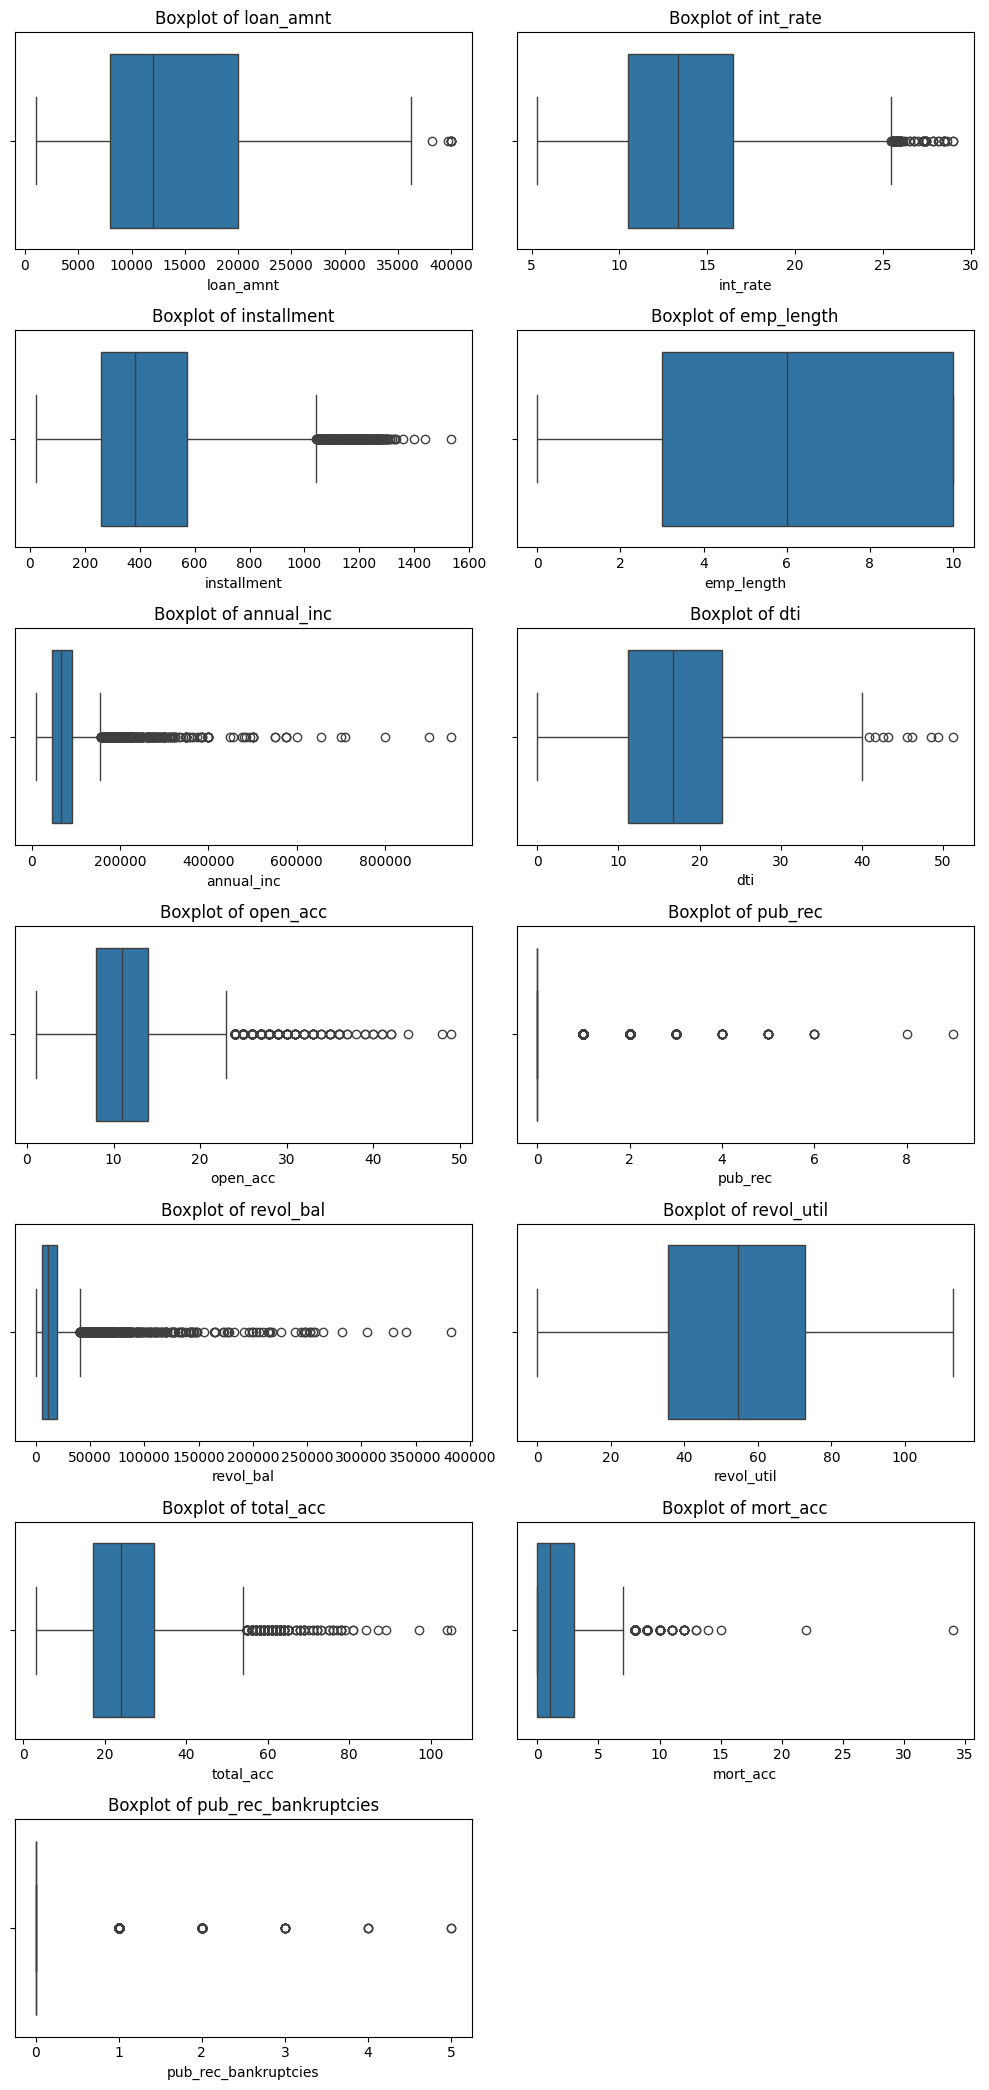

In [ ]:
fig = plt.figure(figsize=(10,21))
i=1
for col in num_cols:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

* Removing Outliers Using Standard Deviation Method; Applying Binary Approach for 'pub_Rec' and 'pub_rec_bankruptcies

In [ ]:
# Converting 'pub_rec' and 'pub_rec_bankruptcies' to Categorical Variables
df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0,'yes','no')
df['pub_rec'] = np.where(df['pub_rec']>0,'yes','no')
df[['pub_rec_bankruptcies','pub_rec']] = df[['pub_rec_bankruptcies','pub_rec']].astype('category')

# Numeric Columns after Converting Public Records to Category
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc'], dtype='object')

In [ ]:
# Removing Outliers Using Standard Deviation
for col in num_cols:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  df = df[~(df[col]>upper)]

In [ ]:
df.shape

(10939, 27)

###**Feature engineering:**

In [ ]:
df['address'].sample(10)

7971          035 Valencia Harbor\r\nCarolynside, SC 70466
5819     7382 Michele Center Apt. 321\r\nLake Thomas, N...
2578            129 Young Manors\r\nWest Melissa, DC 30723
4022             515 Suzanne Island\r\nEast Mary, MI 93700
2617        37992 Thompson Ports\r\nMarshallfurt, MO 05113
6582          83808 Cohen Island\r\nEast Kaitlyn, PA 70466
6405      9321 Catherine Mission\r\nLake Theresa, NM 70466
1475     17147 Keller Estates Apt. 091\r\nJohnside, ND ...
11577        04830 Patrick Mission\r\nBrendafort, HI 05113
10650                   PSC 2661, Box 2409\r\nAPO AP 29597
Name: address, dtype: object

In [ ]:
# Extracting Zip Code and State from Address Column
df[['state', 'zip_code']] = df['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))

In [ ]:
#Dropping address
df.drop(["address"], axis = 1, inplace=True)

In [ ]:
df.zip_code.nunique()

10

In [ ]:
# Converting Zip Codes to Categorical Data Type due to Limited Unique Values
df['zip_code'] = df['zip_code'].astype('category')

###**Continuing Exploratory Data Analysis (EDA):**

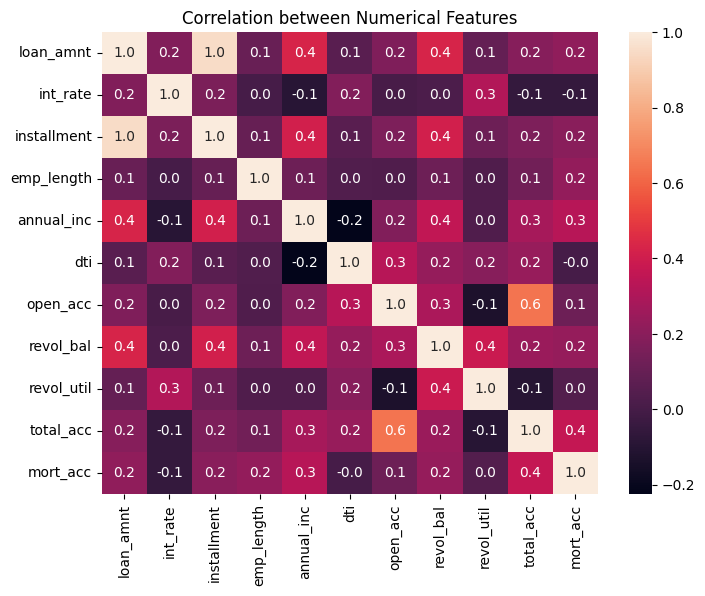

In [ ]:
# Analyzing Correlation Among Numerical Features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.title('Correlation between Numerical Features')
plt.show()

* Identifying Strong Correlation Among Features and Considering Removal to Mitigate Multicollinearity

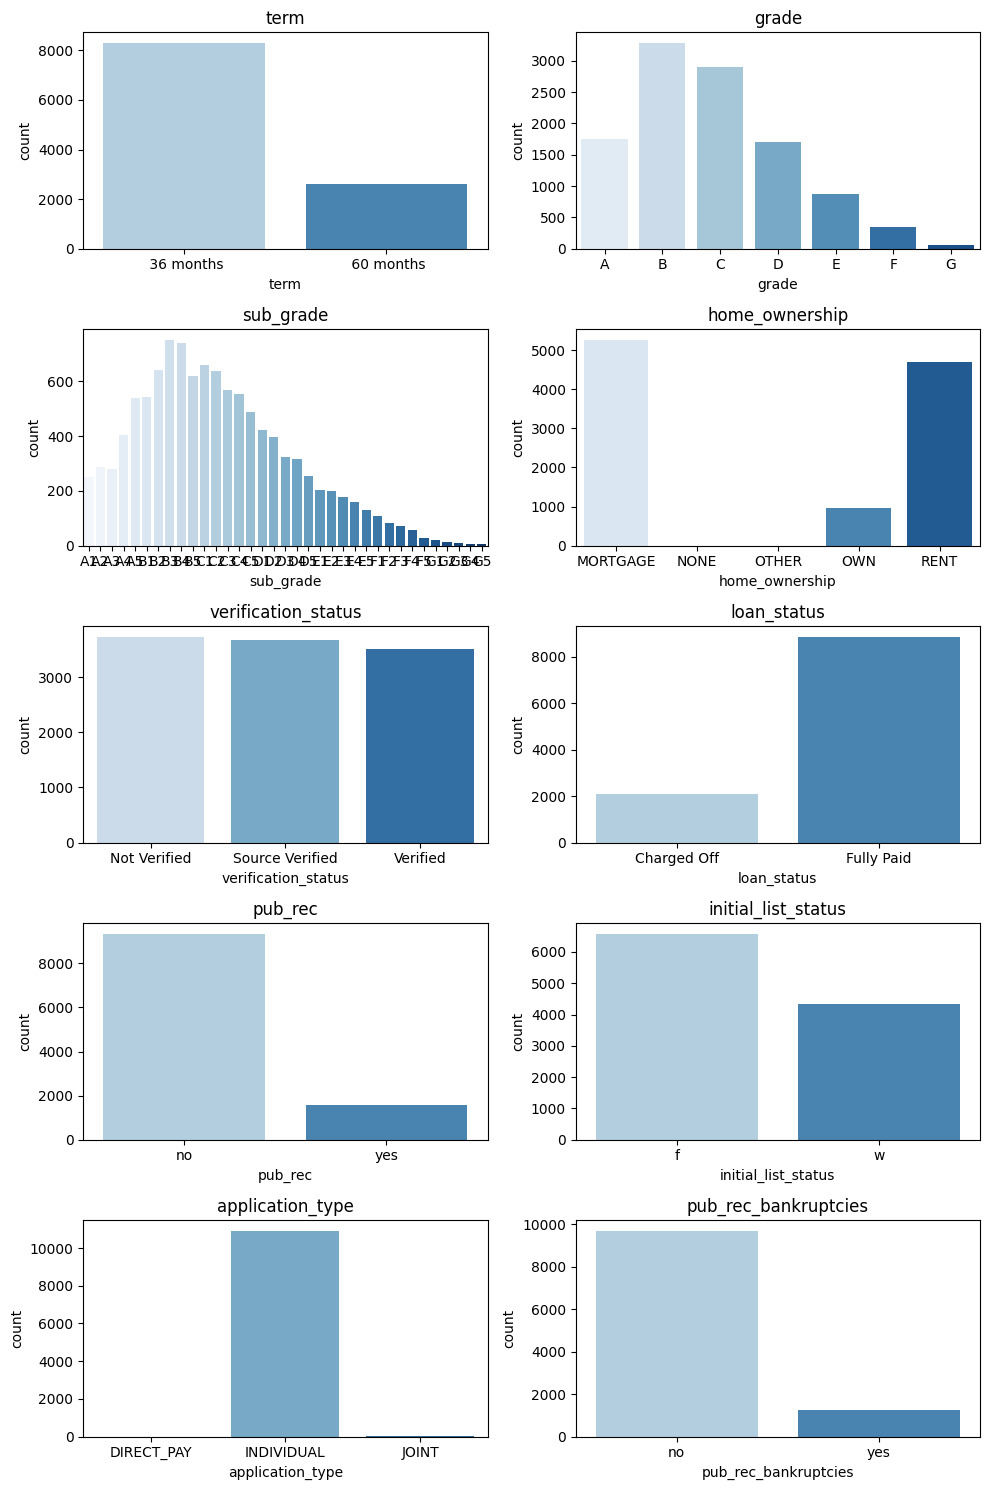

In [ ]:
#Distribution of categorical variables
plot = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(10,15))
i=1
for col in plot:
  ax=plt.subplot(5,2,i)
  sns.countplot(x=df[col], palette='Blues')
  plt.title(f'{col}')
  i += 1

plt.tight_layout()
plt.show()

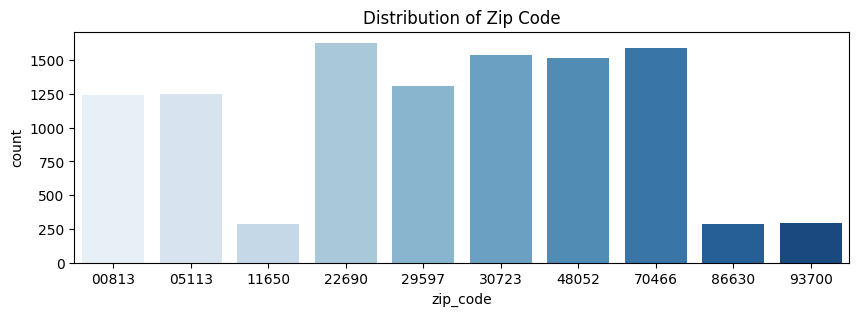

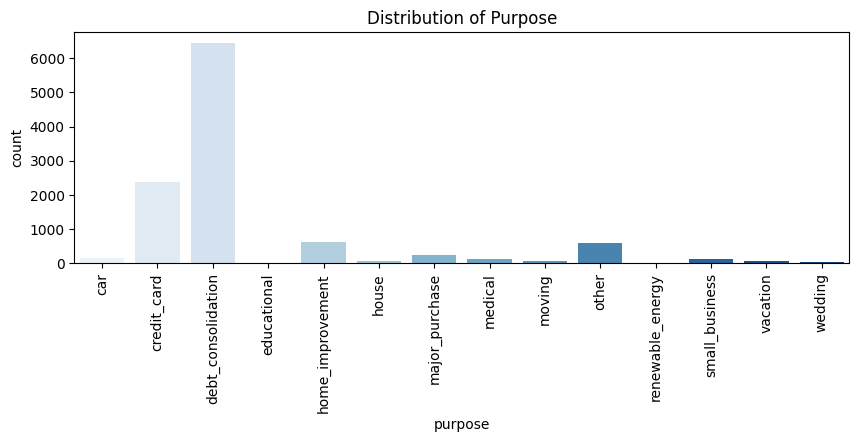

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(x=df['zip_code'], palette='Blues')
plt.title('Distribution of Zip Code')

plt.figure(figsize=(10,3))
sns.countplot(x=df['purpose'], palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution of Purpose')

plt.show()

* Approximately 80% of loans have a 36-month term.

* The highest proportion of loans (30%) are graded as B, followed by C, A, and D, respectively.

* Half of the cases involve mortgage as the type of home ownership.

* The loan status variable is imbalanced, with approximately 75% of loans being fully paid and around 25% being defaulters among the fully paid instances.

* About 80% of applicants do not have a public record or haven't filed for bankruptcy.

* Nearly all applicants (99%) have applied under the 'individual' application type.

* Debt consolidation accounts for 55% of loans, followed by 20% for credit card purposes.

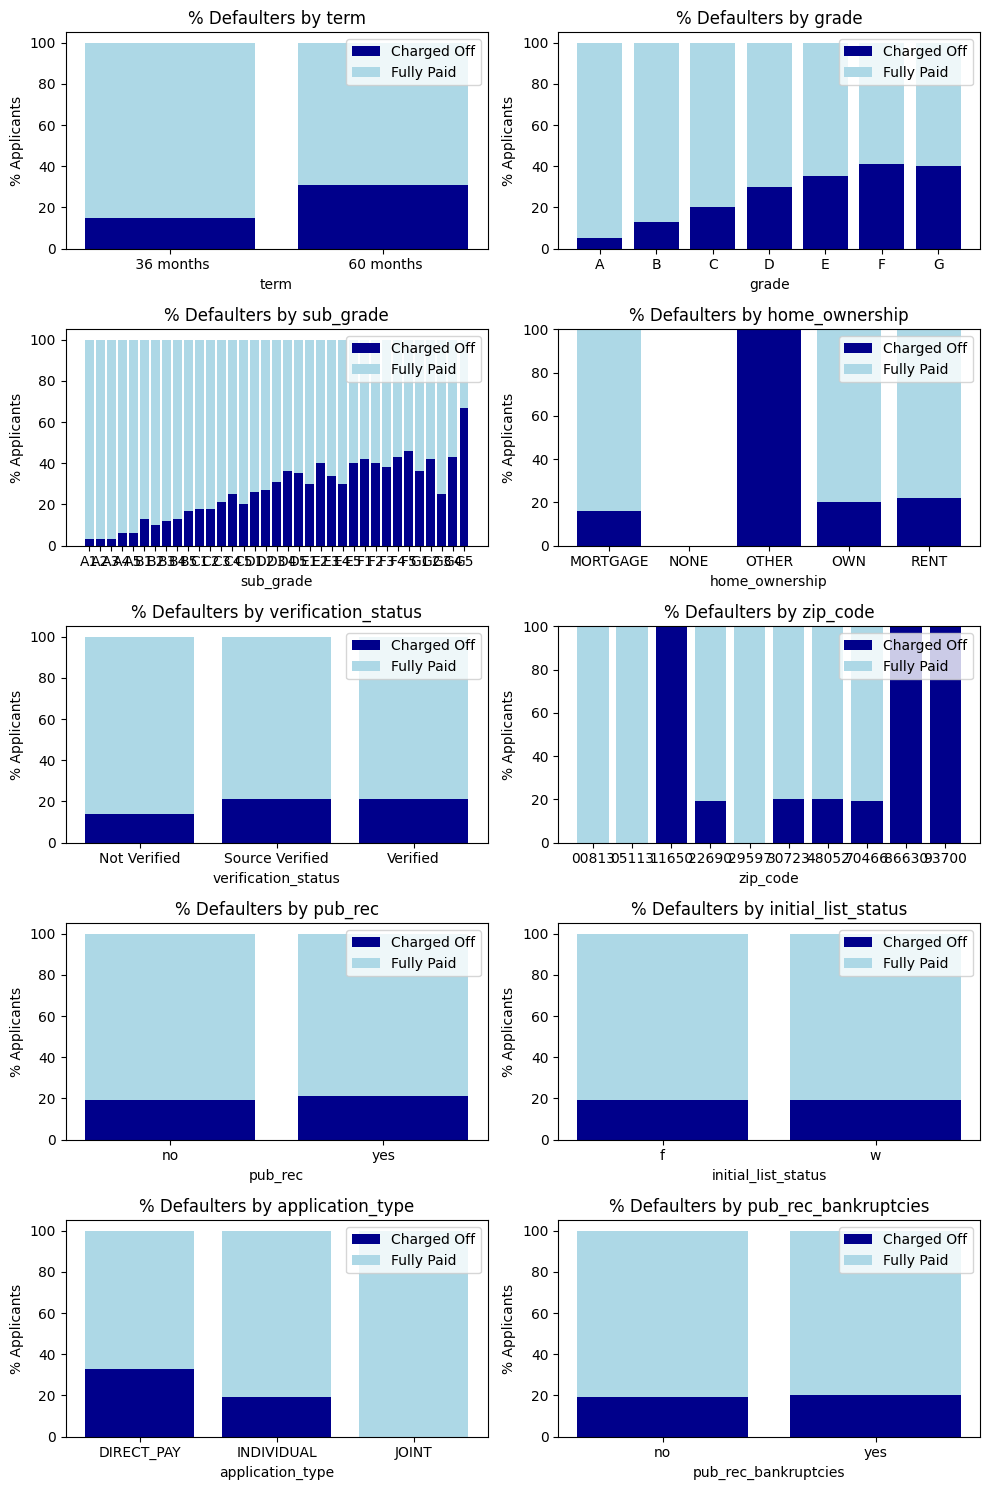

In [ ]:
# Assessing the Influence of Categorical Factors on Loan Status
plot = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'zip_code', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(10,15))
i=1
for col in plot:
  ax=plt.subplot(5,2,i)

  data = df.pivot_table(index=col, columns='loan_status', aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='#00008b')
  plt.bar(data[col],data['Fully Paid'], color='#add8e6', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
  i += 1

plt.tight_layout()
plt.show()

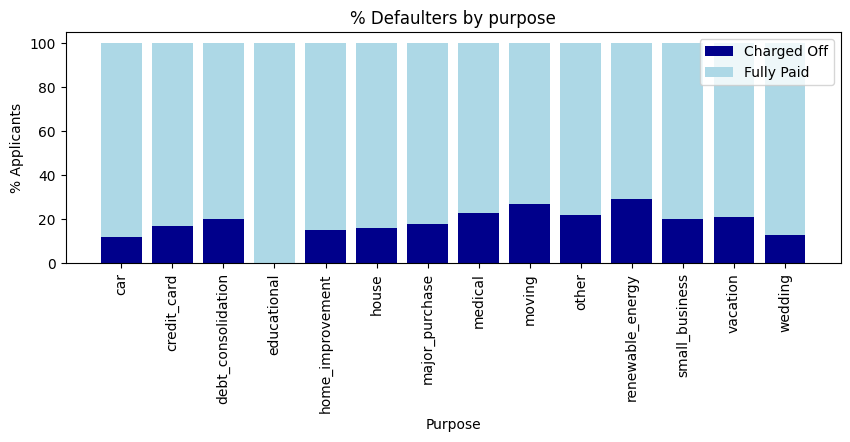

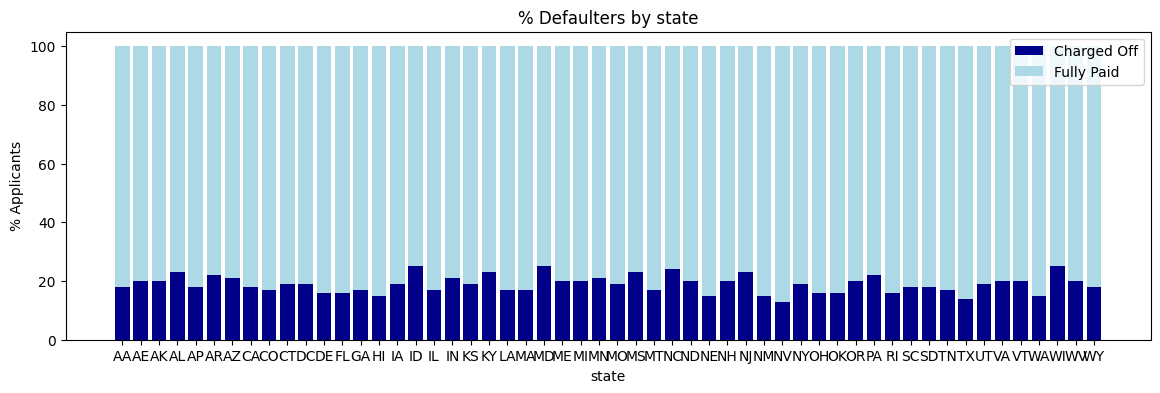

In [ ]:
# Impact of Purpose/state on loan status

purpose = df.pivot_table(index='purpose', columns='loan_status', aggfunc='count', values='sub_grade')
purpose = purpose.div(purpose.sum(axis=1), axis=0).multiply(100).round()
purpose.reset_index(inplace=True)

plt.figure(figsize=(10,3))
plt.bar(purpose['purpose'],purpose['Charged Off'], color='#00008b')
plt.bar(purpose['purpose'],purpose['Fully Paid'], color='#add8e6', bottom=purpose['Charged Off'])
plt.xlabel('Purpose')
plt.ylabel('% Applicants')
plt.title('% Defaulters by purpose')
plt.legend(['Charged Off','Fully Paid'])
plt.xticks(rotation=90)
plt.show()

state = df.pivot_table(index='state', columns='loan_status', aggfunc='count', values='sub_grade')
state = state.div(state.sum(axis=1), axis=0).multiply(100).round()
state.reset_index(inplace=True)

plt.figure(figsize=(14,4))
plt.bar(state['state'],state['Charged Off'], color='#00008b')
plt.bar(state['state'],state['Fully Paid'], color='#add8e6', bottom=state['Charged Off'])
plt.xlabel('state')
plt.ylabel('% Applicants')
plt.title('% Defaulters by state')
plt.legend(['Charged Off','Fully Paid'])
plt.show()

* Default rates are significantly higher for longer (60-month) term loans compared to shorter terms.

* Grades and sub-grades show substantial impact on loan status, with higher grade loans having a higher default rate.

* Features like initial_list_status and state exhibit no discernible impact on loan status and may be considered for removal.

* Surprisingly, public records do not seem to influence loan status significantly.

* Direct pay application type demonstrates a higher default rate compared to individual or joint applications.

* Loans taken for small business purposes show the highest default rate among loan purposes.

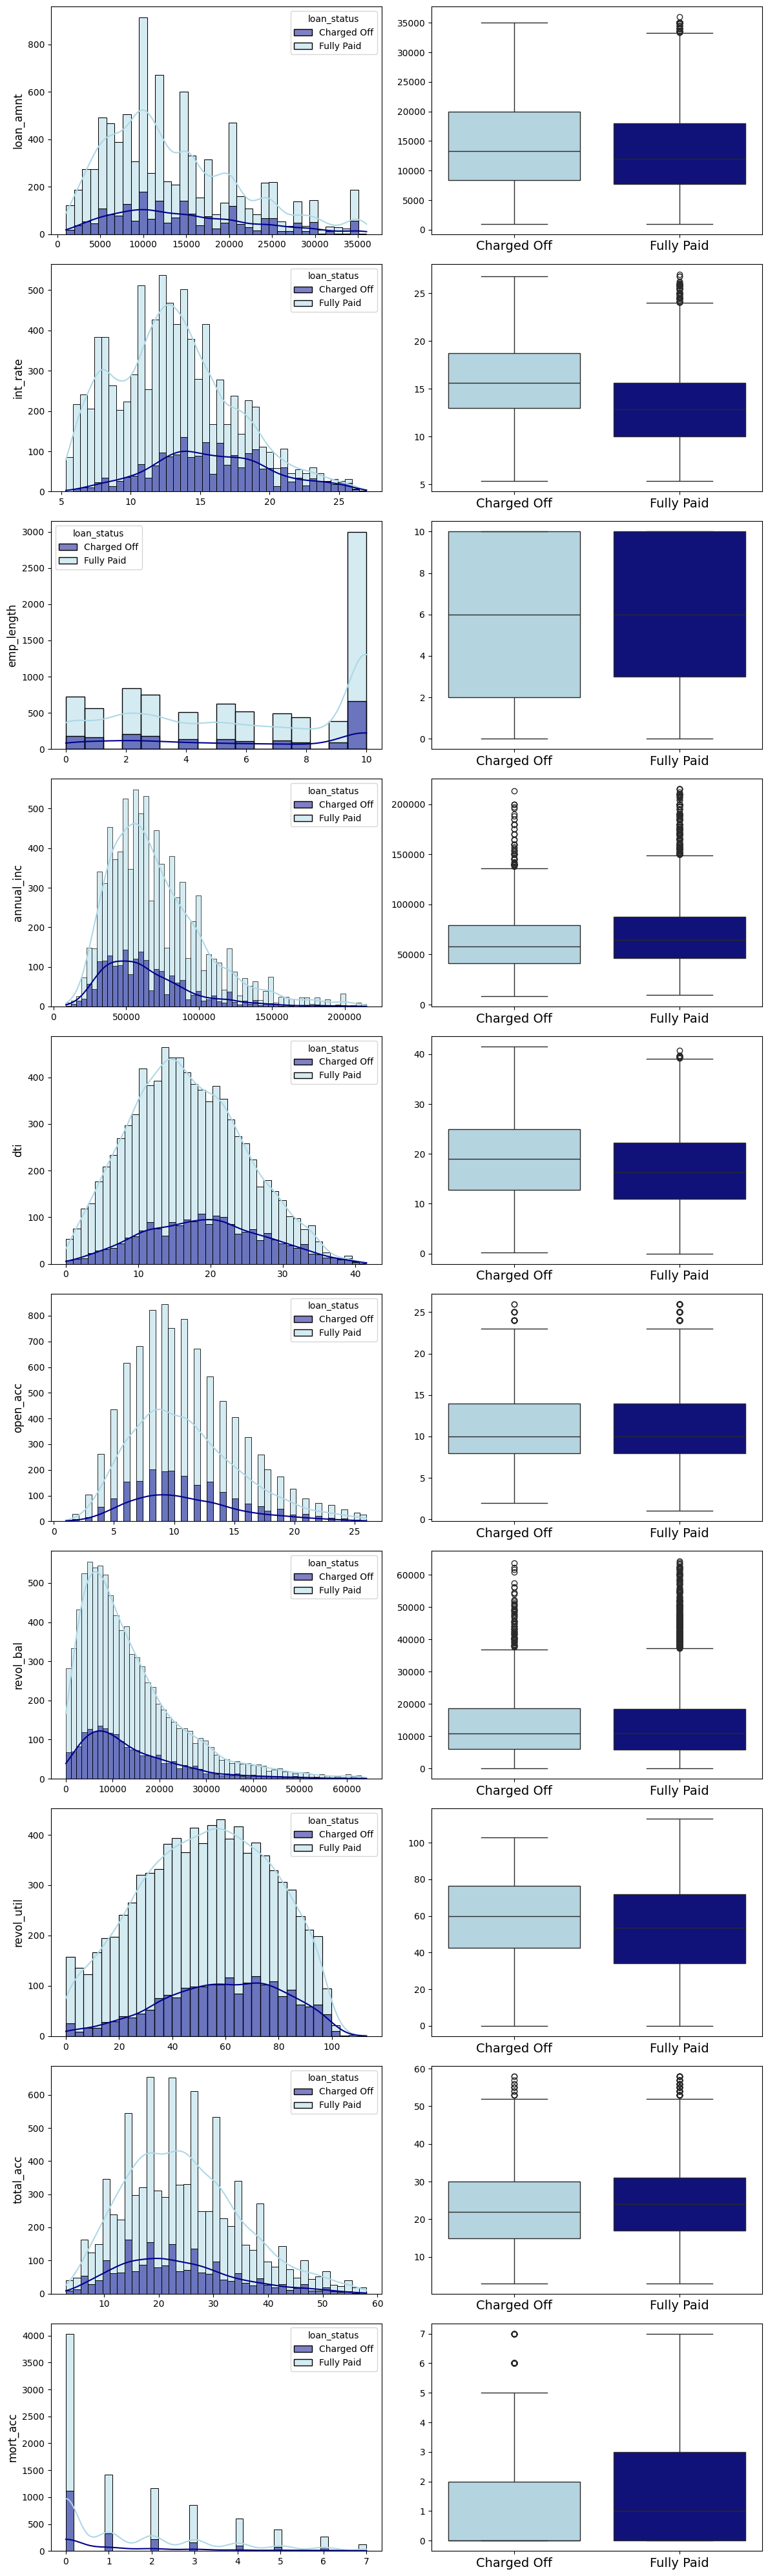

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Impact of numerical features on loan_status
num_cols = df.select_dtypes(include='number').columns

fig, ax = plt.subplots(len(num_cols), 2, figsize=(12, 4 * len(num_cols)))

color_dict = {'Fully Paid': mcolors.to_rgba('#add8e6', 0.5),
              'Charged Off': mcolors.to_rgba('#00008b', 1)}

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='loan_status', ax=ax[i, 0], legend=True,
                 palette=color_dict, kde=True, fill=True)
    sns.boxplot(data=df, y=col, x='loan_status', ax=ax[i, 1],
                palette=color_dict.values())

    ax[i, 0].set_ylabel(col, fontsize=12)
    ax[i, 0].set_xlabel('')
    ax[i, 1].set_xlabel('')
    ax[i, 1].set_ylabel('')
    ax[i, 1].xaxis.set_tick_params(labelsize=14)

plt.tight_layout()
plt.show()


* Defaulters tend to have slightly higher mean loan amounts, interest rates, debt-to-income ratios (DTI), open accounts, and revolving credit utilization compared to non-defaulters.Conversely, defaulters exhibit lower mean annual incomes compared to non-defaulters.

In [7]:
# Removing Columns with No Impact on Loan Status
df.drop(columns=['initial_list_status','emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade'], inplace=True)

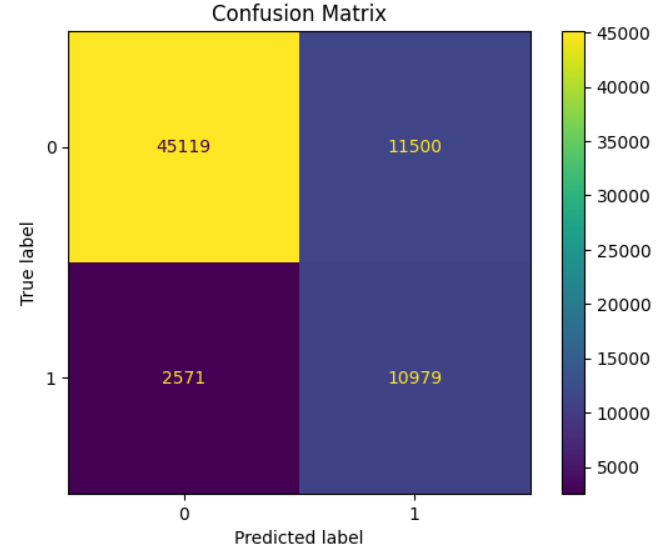###**Data Preprocessing:**

In [9]:

# Check for non-finite values in 'loan_status' column
non_finite_values = df['loan_status'].isna() | ~df['loan_status'].isin(['Fully Paid', 'Charged Off'])

# Print rows with non-finite values
print(df[non_finite_values])

# Remove rows with non-finite values
df = df[~non_finite_values]

# Encoding Target Variable
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1}).astype(int)


      loan_amnt        term  int_rate  installment grade emp_length home_ownership  annual_inc verification_status loan_status purpose  dti  open_acc  pub_rec  revol_bal  revol_util  total_acc application_type  mort_acc  pub_rec_bankruptcies address
8280    10000.0   36 months       8.9       317.54     A    9 years           RENT     25000.0         Source Veri         NaN     NaN  NaN       NaN      NaN        NaN         NaN        NaN              NaN       NaN                   NaN     NaN


In [10]:
x = df.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)
y = df['loan_status']
y.reset_index(drop=True, inplace=True)

In [12]:
# Check for non-finite values in 'pub_rec' column
non_finite_values = x['pub_rec'].isna() | ~x['pub_rec'].isin(['no', 'yes'])

# Print rows with non-finite values
print(x[non_finite_values])

# Remove rows with non-finite values
x = x[~non_finite_values]

# Encoding Binary features into numerical dtype
x['term'] = x['term'].map({' 36 months': 36, ' 60 months': 60}).astype(int)
x['pub_rec'] = x['pub_rec'].map({'no': 0, 'yes': 1}).astype(int)
x['pub_rec_bankruptcies'] = x['pub_rec_bankruptcies'].map({'no': 0, 'yes': 1}).astype(int)


      loan_amnt  term  int_rate  installment grade emp_length home_ownership  annual_inc verification_status             purpose    dti  open_acc  pub_rec  revol_bal  revol_util  total_acc application_type  mort_acc  pub_rec_bankruptcies                                            address
0       10000.0    36     11.44       329.48     B  10+ years           RENT    117000.0        Not Verified            vacation  26.24      16.0      0.0    36369.0        41.8       25.0       INDIVIDUAL       0.0                   0.0     0174 Michelle Gateway\r\nMendozaberg, OK 22690
1        8000.0    36     11.99       265.68     B    4 years       MORTGAGE     65000.0        Not Verified  debt_consolidation  22.05      17.0      0.0    20131.0        53.3       27.0       INDIVIDUAL       3.0                   0.0  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2       15600.0    36     10.49       506.97     B   < 1 year           RENT     43057.0     Source Verified         credit_card  12.

####Continuing with One-Hot Encoding of Categorical Features for Model Preparation

In [14]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = x.select_dtypes('category').columns

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x, encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address


####**Train-Test Split:**

In [32]:
# Separate features (x) and target variable (y)
y = df['loan_status']
x = df.drop(columns=['loan_status'])

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (316824, 26)
Shape of x_test: (79206, 26)
Shape of y_train: (316824,)
Shape of y_test: (79206,)


####**Scaling Numeric Features:**

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for scaling (exclude non-numeric or categorical columns)
numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform scaler on training data
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])

# Transform test data using the same scaler
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])


In [36]:
x_train.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
259178,0.493671,36 months,0.337748,0.439722,C,C4,equipment operator,3 years,MORTGAGE,0.007895,Source Verified,Aug-2015,debt_consolidation,Debt consolidation,0.000612,Feb-1990,0.077778,0.000000,0.006385,0.083156,0.120805,w,INDIVIDUAL,0.029412,0.000,"0670 Davis Center Apt. 552\r\nWoodbury, AK 30723"
365838,0.746835,60 months,0.686794,0.546066,F,F1,Gilt Groupe,< 1 year,RENT,0.036316,Source Verified,Nov-2012,debt_consolidation,Strategy 2.0,0.000512,Apr-2000,0.088889,0.000000,0.010253,0.103216,0.080537,f,INDIVIDUAL,0.000000,0.000,1663 Mitchell Roads Suite 478\r\nNorth Anthony...
131932,0.382278,36 months,0.268407,0.331838,B,B5,Mesquite ISD,7 years,RENT,0.006579,Not Verified,Jun-2009,debt_consolidation,Debt Consolidation,0.000406,Oct-2000,0.111111,0.000000,0.009519,0.061975,0.161074,f,INDIVIDUAL,NaN,0.000,"95156 Erik Mews\r\nWest Tricia, MO 00813"
146867,0.608228,36 months,0.460460,0.566649,D,D4,Mananger,4 years,RENT,0.009474,Verified,Feb-2015,debt_consolidation,Debt consolidation,0.003205,Apr-1997,0.144444,0.011628,0.007024,0.040233,0.120805,f,INDIVIDUAL,0.088235,0.125,"15043 Wade Creek Suite 947\r\nFuentesshire, NC..."
121958,0.367089,60 months,0.400857,0.227702,D,D1,Supply Supervisor,1 year,MORTGAGE,0.007895,Not Verified,Jul-2015,debt_consolidation,Debt consolidation,0.001048,Jun-2010,0.111111,0.000000,0.006237,0.095147,0.067114,w,INDIVIDUAL,0.058824,0.000,USNV Clark\r\nFPO AE 70466


####**Oversampling with SMOTE:**

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Assuming x_train and y_train are defined
# Define x_train and y_train here or ensure they are defined earlier in your code


# Define x_train with your actual training features
x_train = pd.DataFrame({
    'feature1': [10, 20, 30, 40, 50],  # Example values for feature1
    'feature2': [0.1, 0.5, 0.9, 1.2, 1.5]  # Example values for feature2
})
y_train = pd.Series([0, 1, 0, 1, 0])  # Example labels (0 and 1)



# Identify categorical features
categorical_features = x_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Create ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', encoder, categorical_features)
    ],
    remainder='passthrough'  # passthrough numerical features
)

# Apply ColumnTransformer to train data
x_train_transformed = ct.fit_transform(x_train)

# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to a lower value

# Perform oversampling on transformed data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_transformed, y_train)

# Print counts before and after oversampling
print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_resampled == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_resampled == 0)}")


Before OverSampling, count of label 1: 2
Before OverSampling, count of label 0: 3
After OverSampling, count of label 1: 3
After OverSampling, count of label 0: 3


In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Define x_train and y_train with your actual training data and labels
x_train = pd.DataFrame({
    'feature1': [10, 20, 30, 40, 50],  # Example values for feature1
    'feature2': [0.1, 0.5, 0.9, 1.2, 1.5]  # Example values for feature2
})
y_train = pd.Series([0, 1, 0, 1, 0])  # Example labels (0 and 1)

# Check class distribution before resampling
print("Before resampling:")
print("Class distribution:", Counter(y_train))

# Initialize SMOTE for oversampling
# Initialize SMOTE for oversampling with a lower number of neighbors
smote = SMOTE(random_state=42, k_neighbors=1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# Initialize RandomUnderSampler for undersampling
undersampler = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train_resampled, y_train_resampled)

# Check class distribution after resampling
print("After resampling:")
print("Class distribution:", Counter(y_train_resampled))


Before resampling:
Class distribution: Counter({0: 3, 1: 2})
After resampling:
Class distribution: Counter({0: 3, 1: 3})


###**Logistic Regression:**

In [ ]:
model = LogisticRegression()
model.fit(x_train_res, y_train_res)
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

#Model Evaluation
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Train Accuracy : 0.8

Train F1 Score: 0.61

Train Recall Score: 0.81

Train Precision Score: 0.49

Test Accuracy : 0.8

Test F1 Score: 0.61

Test Recall Score: 0.81

Test Precision Score: 0.49

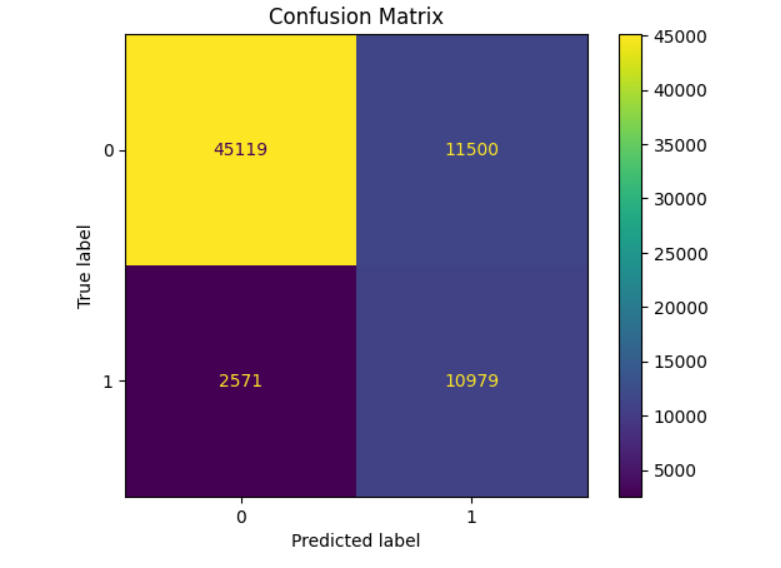

####**Feature Importance:**

In [ ]:
feature_imp = pd.DataFrame({'Columns':x_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

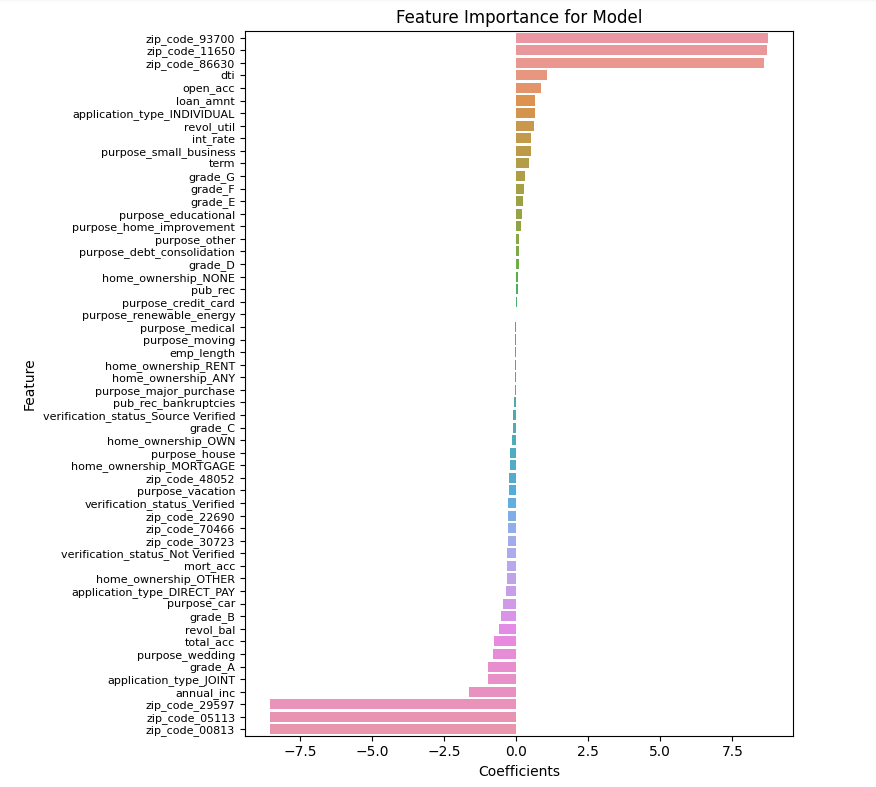

####**ROC AUC:**

**AUC (Area Under the Curve):** A single metric representing the overall performance of a binary classification model based on the area under its ROC curve.

**ROC Curve (Receiver Operating Characteristic Curve):** A graphical plot illustrating the trade-off between True Positive Rate and False Positive Rate at various classification thresholds.

**True Positive Rate (Sensitivity):** Proportion of actual positives correctly identified by the model.

**False Positive Rate:** The model incorrectly classifies the proportion of actual negatives as positives.

**Specificity (True Negative Rate):** Proportion of actual negatives correctly identified by the model.

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probs = model.predict_proba(x_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


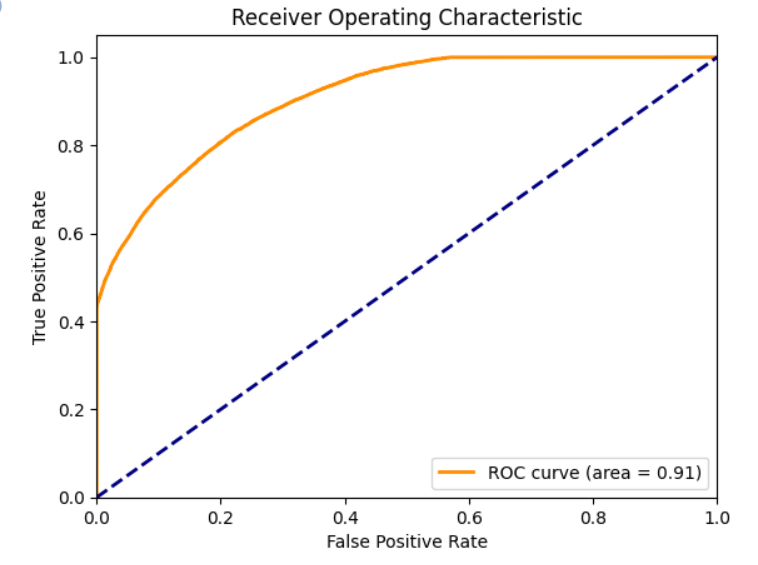

* AUC of 0.91 signals effective discrimination between positive and negative classes.
* However, it may not adequately assess imbalanced target variables.
* High AUC values can mask poor performance on minority class instances.
* This discrepancy arises when the model excels at classifying majority class instances.
* Precision-Recall curves offer a more suitable evaluation method for imbalanced data

####**Precision Recall Curve:**

**Precision** is the proportion of correct positive classifications (true positive) divided by the total number of predicted positive classifications that were made (true positive + false positive).

**Recall** is the proportion of correct positive classifications (true positive) divided by the total number of the truly positive classifications (true positive + false negative).

A PR curve is simply a graph with Precision values on the y-axis and Recall values on the x-axis. In other words, the PR curve contains \frac{TP}{TP+FP}     on the y-axis and \frac{TP}{TP+FN}     on the x-axis.

* It is important to note that Precision is also called the Positive Predictive Value (PPV).
* The recall is also called Sensitivity, Hit Rate, or True Positive Rate (TPR).

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision-Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


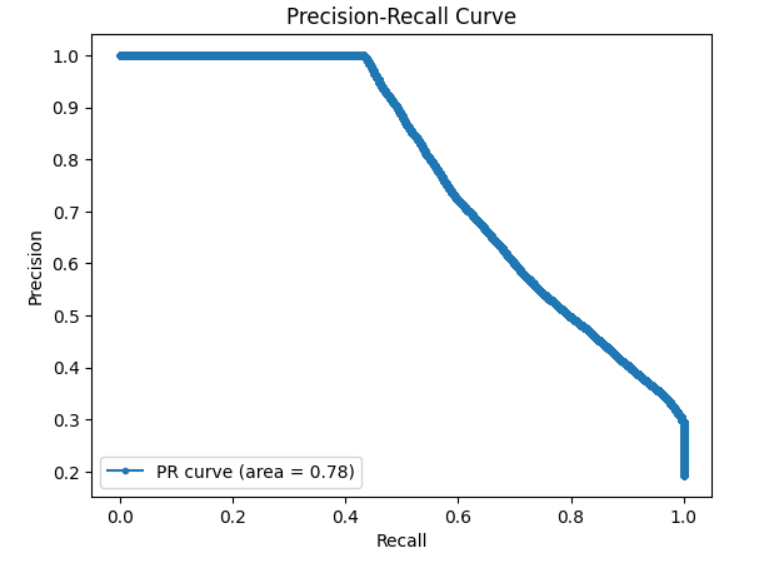

* The area under the Precision-Recall curve is typically not as high as the ROC curve for imbalanced datasets.
* Despite this, a value above 0.5 indicates that the model performs better than random guessing.
* While the model shows promise, there remains room for improvement in its performance.
* Further enhancements could be pursued to increase the area under the Precision-Recall curve and thus enhance the model's effectivenes

###**Insights:**

**Categorical Attributes Impact:**

* Longer loan terms (60-month) correlate with a higher percentage of defaulters.
* Grades and sub-grades significantly influence loan status, with higher grades exhibiting more defaulters.
* Attributes like initial_list_status and state seem to have no discernible impact on loan_status.
* Applications with a direct pay application type show a higher default rate compared to individual or joint applications.
* Loans intended for small businesses demonstrate the highest default rate.

**Numerical Attributes Impact:**

* Defaulters tend to have higher mean values for loan_amnt, int_rate, dti, open_acc, and revol_util.
* The mean annual income is lower among defaulters.

**Model Performance:**

* A Logistic Regression model, trained after upsampling to balance the target variable, achieves an accuracy of 80%.
* Precision, recall, and F1 scores on the negative class are 95%, 80%, and 87% respectively.
* Precision, recall, and F1 scores on the positive class are 49%, 81%, and 61% respectively.
* The ROC curve indicates an area under the curve of 0.91, demonstrating the model's ability to differentiate between classes.
* The Precision-Recall curve shows an area under the curve of 0.78, indicating room for improvement, possibly through hyperparameter tuning or increasing model complexity.


###**Recommendations:**

**Balancing Risk and Opportunity:**

* Optimize for F1 score along with the area under the Precision-Recall Curve to balance the risk of increasing NPAs while maximizing opportunities to disburse loans to creditworthy customers.

**Consider More Complex Classifiers:**

* Explore using more complex classifiers like random forest, which may offer better performance compared to logistic regression, particularly if decision boundaries are nonlinear.





